<a href="https://colab.research.google.com/github/AbdulFahad-kh/todolistapp-ma/blob/main/RAINFALL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [35]:
# Import Libraries'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load & Analyze Dataset:

#### Load the dataset

- The loading of a dataset refers to importing data into a programming environment for the analysis. To load the CSV data, we use the read_csv() function of the pandas library.
- The function head() displays the first 5 records of the imported dataframe. Alternatively, we can use the sample() function which displays random 5 records from the dataframe.

In [36]:
# Load the dataset
file_path = '/content/drive/My Drive/Colab Notebooks/Rainfall.csv'
df = pd.read_csv(file_path)

# Display first 5 records
df.head()

,day,pressure,maxtemp,temperature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


- The info() is a method of the pandas library and it provides a concise summary of a DataFrame. It helps in understanding the structure of the dataset, such as the number of null-values in each column, the data type of each column, and the memory usage by the created dataframe.

In [37]:
# Display dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temperature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


#### Handling Missing Values

- The below function of the pandas library is useful to check the number of missing values in the dataframe. From this it is analyzed that the winddirection and windspeed contains 1-1 missing values.

In [38]:
# Checking for null values
df.isnull().sum()

,0
day,0
pressure,0
maxtemp,0
temperature,0
mintemp,0
dewpoint,0
humidity,0
cloud,0
rainfall,0
sunshine,0


- Uisng df.dropna() function we remove the missing values in winddireaction & windspeed.

In [39]:
# Frop the null values
df = df.dropna()
df.isnull().sum()

,0
day,0
pressure,0
maxtemp,0
temperature,0
mintemp,0
dewpoint,0
humidity,0
cloud,0
rainfall,0
sunshine,0


#### Handling Duplicate Values

- The function below is used to check for duplicate values in a dataframe. From this, it is observed that no duplicate values are present in dataframe.

In [40]:
# Checking for duplicate values
df.duplicated().sum()

np.int64(0)

#### Covnert Target Variable

- In the below cell, we convert the categorical column into a numeric column for further analysis.

In [41]:
# Convert target variable in numeric values
df['rainfall'] = df['rainfall'].map({'yes': 1, 'no': 0})
df['rainfall'].value_counts()

,count
rainfall,
1,248
0,117


## Exploratory Data Analysis (EDA)

- Exploratory Data Analysis (EDA) is crucial in Machine Learning because it helps in understanding the dataset before model building. It identifies patterns, detects missing or inconsistent data, and uncovers relationships between variables. Proper EDA ensures better feature selection, improves model performance, and prevents errors like data leakage or biased predictions.

- In the cell below, we set the color for the color palette. Blue indicates rainy and orange-warmness indicates no rain.

In [42]:
# Set the color
color_map = {1: 'skyblue', 0: 'orange'}

#### Rainfall Distribution

- The majority of the observations (about 68%) correspond to days with rainfall.
- Non-rainy days constitute approximately 32% of the dataset, showing a slightly class imbalance.

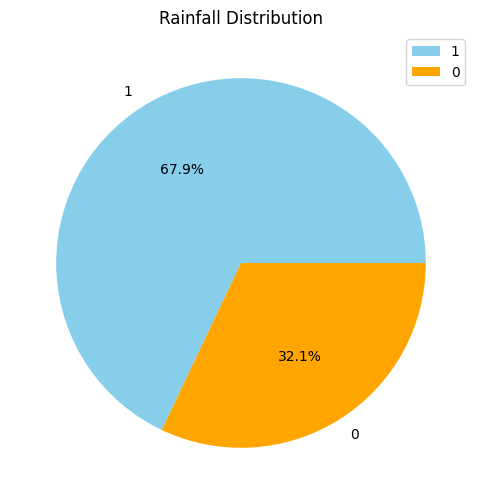

In [43]:
# Plot Rainfall Distribution
y_values = df['rainfall'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(y_values.values, labels=y_values.index, autopct='%1.1f%%', colors={'skyblue', 'orange'})
plt.title("Rainfall Distribution")
plt.legend()
plt.show()

#### Boxplot of Pressure by Rainfall

- Median pressure is slightly higher on non-rainy days than on rainy days.
- There is more variability in pressure when it doesn't rain, suggesting stable pressure may correlate with rainfall.

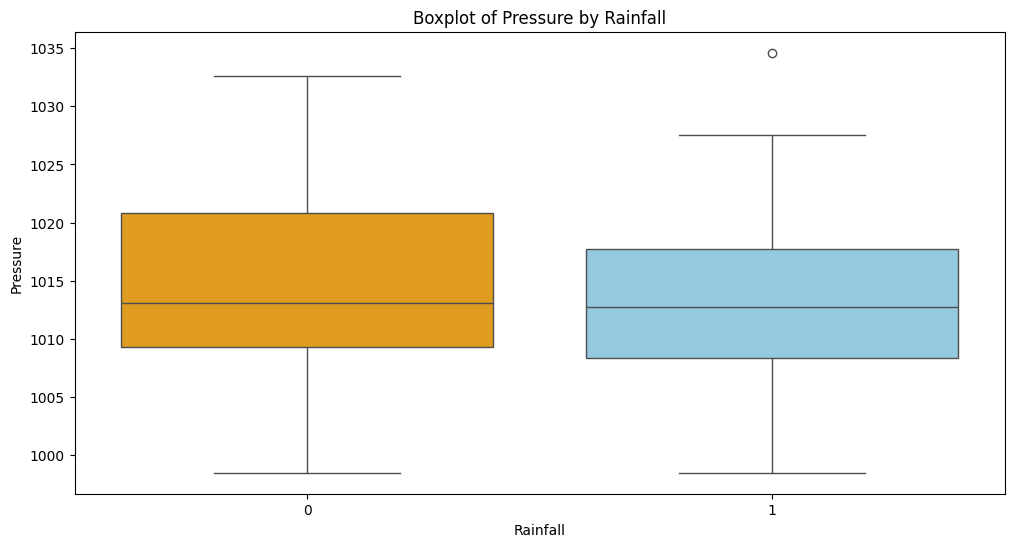

In [44]:
# Strip spaces from column names
df.columns = df.columns.str.strip()

# Plot Boxplot
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='rainfall', y='pressure', palette={'1': 'skyblue', '0': 'orange'})
plt.title("Boxplot of Pressure by Rainfall")
plt.xlabel("Rainfall")
plt.ylabel("Pressure")
plt.show()

#### Boxplot of Dewpoint by Rainfall

- Dewpoint values are generally higher on rainy days.
- Non-rainy days show a broader range, with lower outliers suggesting drier air.

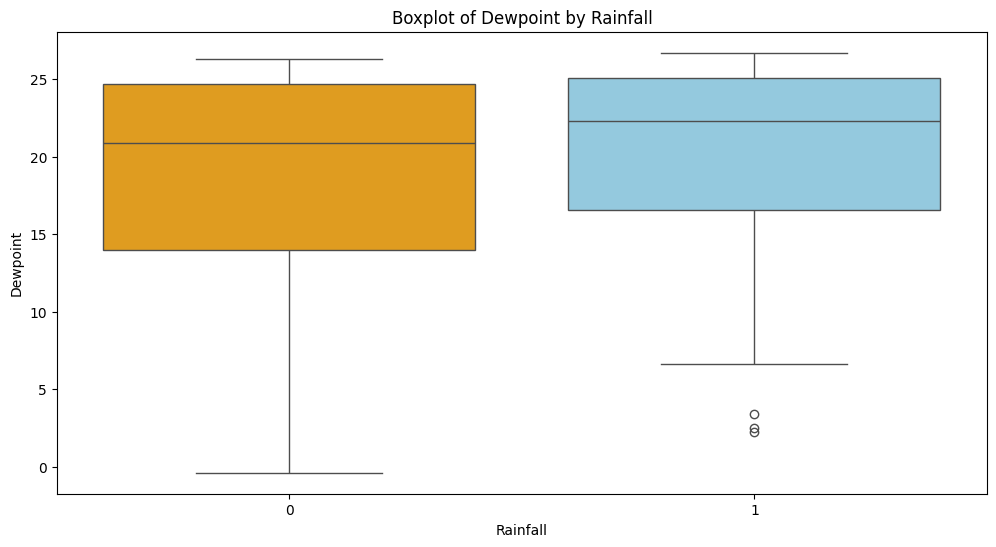

In [45]:
# Plot Boxplot for Dewpoint by Rainfall"
plt.figure(figsize=(12,6))
sns.boxplot(data =df, x='rainfall', y = 'dewpoint', palette={'1': 'skyblue', '0': 'orange'})
plt.title("Boxplot of Dewpoint by Rainfall")
plt.xlabel("Rainfall")
plt.ylabel("Dewpoint")
plt.show()

#### Boxplot of Humidity by Rainfall

- Humidity is significantly higher on rainy days, with most values concentrated between 80–100%
- Non-rainy days have a wider spread and lower median humidity, supporting its role in rain prediction.

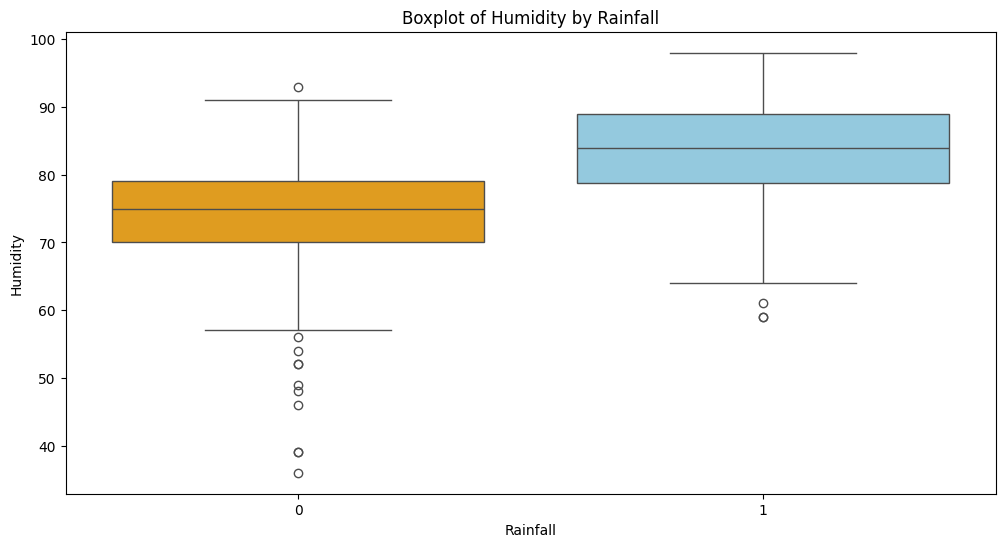

In [46]:
df.columns = df.columns.str.strip()

# Plot Boxplot for Humidity by Rainfall
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='rainfall', y='humidity', palette={'0': 'orange', '1': 'skyblue'})
plt.title("Boxplot of Humidity by Rainfall")
plt.xlabel("Rainfall")
plt.ylabel("Humidity")
plt.show()

#### Distribution of Cloud by Rainfall

- Cloud cover is strongly associated with rainfall: higher cloud values (80–100%) mostly occur on rainy days.
- Non-rainy days exhibit a flatter and more dispersed cloud distribution, especially under 60%.

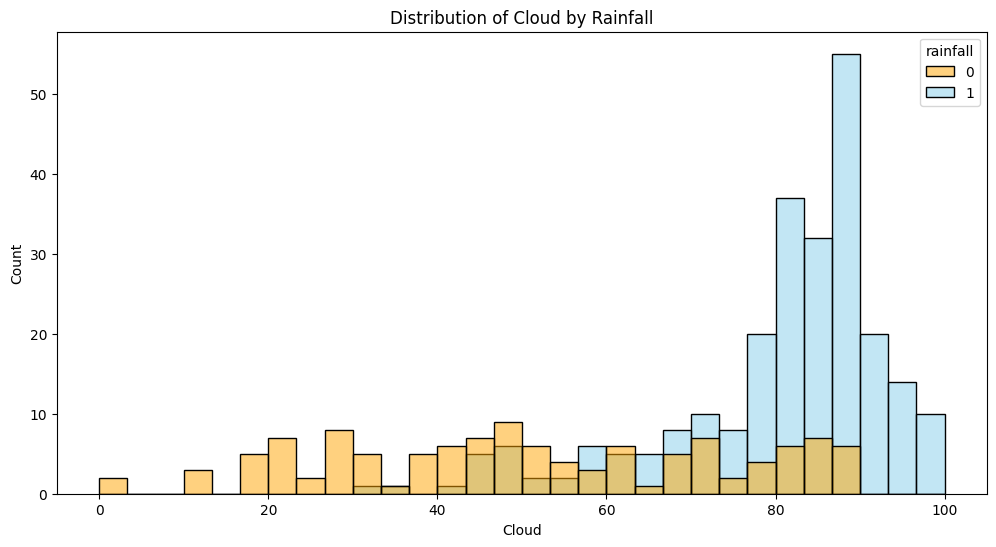

In [47]:
# Plot Distribution of Cloud by Rainfall
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='cloud', hue='rainfall', bins=30, palette=color_map)
plt.title("Distribution of Cloud by Rainfall")
plt.xlabel("Cloud")
plt.show()

#### Distribution of Sunshine by Rainfall

- Rainy days have significantly lower sunshine hours, with values concentrated near zero.
- Non-rainy days show a wider range of sunshine, often between 5 to 10 hours.

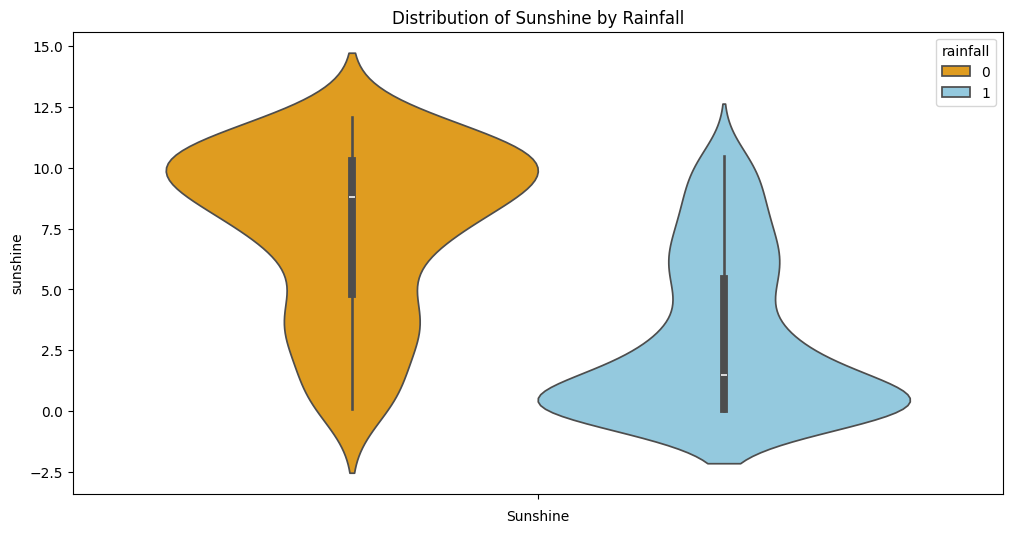

In [48]:
# Plot Distribution of Sunshine by Rainfall
plt.figure(figsize=(12,6))
sns.violinplot(data=df, y='sunshine', hue='rainfall', palette=color_map)
plt.title("Distribution of Sunshine by Rainfall")
plt.xlabel("Sunshine")
plt.show()

#### Boxplot of Wind Speed by Rainfall

- Rainy days tend to have slightly higher wind speeds on average.
- The interquartile range and the number of high-value outliers are greater when it rains, hinting at windier conditions.

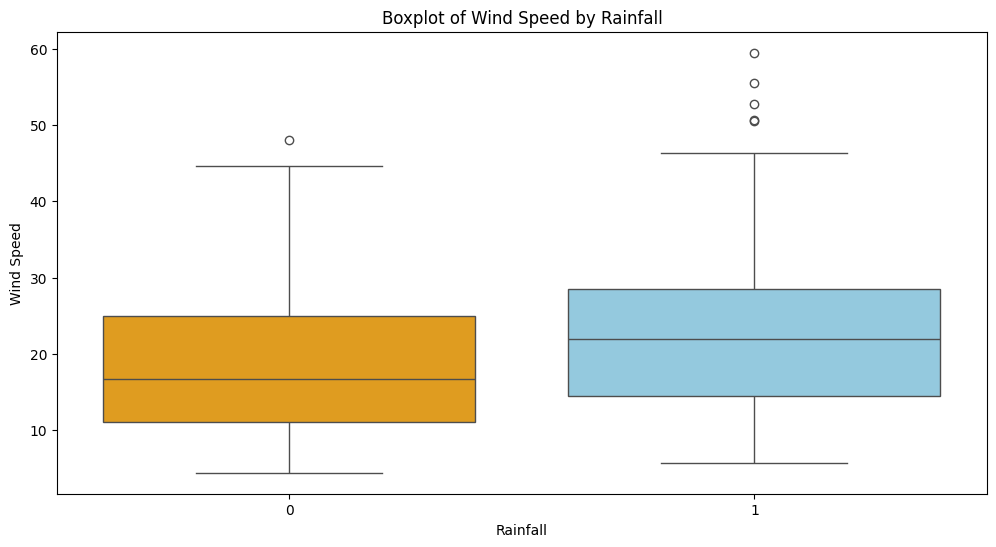

In [49]:
# Plot Boxplot for Wind Speed by Rainfall
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x = 'rainfall', y='windspeed', palette={'1': 'skyblue', '0': 'orange'})
plt.title("Boxplot of Wind Speed by Rainfall")
plt.xlabel("Rainfall")
plt.ylabel("Wind Speed")
plt.show()

#### Humidity vs Dewpoint by Rainfall

- Higher humidity correlates with higher dewpoints, especially for rainy days.
- Rainy observations cluster in the upper-right, reinforcing that high humidity and dewpoint are strong indicators of rain.

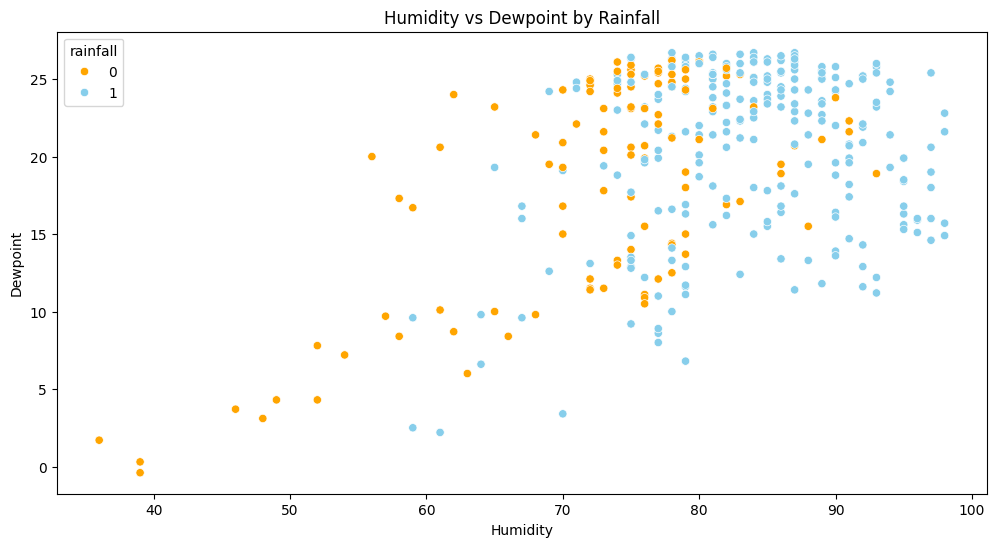

In [50]:
# Plot Humidity vs Dewpoint by Rainfall
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='humidity', y='dewpoint', hue='rainfall', palette=color_map)
plt.title("Humidity vs Dewpoint by Rainfall")
plt.xlabel("Humidity")
plt.ylabel("Dewpoint")
plt.show()

#### Sunshine vs Cloud by Rainfall

- There's an inverse relationship between sunshine and cloud cover, more prominent on rainy days.
- Rainy days are mostly associated with high cloud and low sunshine, while dry days are spread more widely.

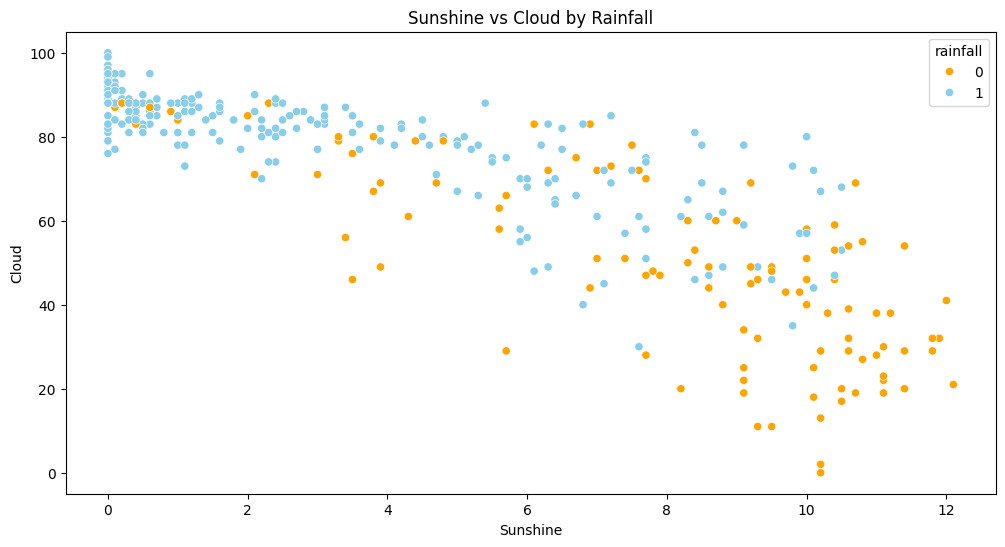

In [51]:
# Plot Sunshine vs Cloud by Rainfall
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='sunshine', y='cloud', hue='rainfall', palette=color_map)
plt.title("Sunshine vs Cloud by Rainfall")
plt.xlabel("Sunshine")
plt.ylabel("Cloud")
plt.show()

## Feature Engineering

- Feature engineering is the process of creating new features from existing ones to enhance model performance. In this section, four new features have been created:

1. temp_range: Represents the temperature variation in a day, calculated as the difference between maxtemp and mintemp.
**Formula: temp_range = maxtemp - mintemp**

2. humidity_dew_gap: Captures the gap between ambient temperature and atmospheric moisture, created by subtracting humidity from temperature.
**Formula: humidity_dew_gap = temperature - humidity**

3. cloud_sun_ratio: Indicates the balance between cloud cover and sunlight. A higher ratio may imply overcast conditions.
**Formula: cloud_sun_ratio = cloud / (sunshine +1)**
- Here 1 is added to avoid the calcualation error in case of sunshine = 0.


4. temp_pressure_index: Combines temperature and pressure to capture atmospheric conditions that may influence rainfall.
**Formula: temp_pressure_index = temperature / pressure**

In [52]:
# Add new features
df['temp_range'] = df['maxtemp'] - df['mintemp']
df['humidity_dew_gap'] = df['temperature'] - df['humidity']
df['cloud_sun_ratio'] = df['cloud']/(df['sunshine'] + 1.0)
df['temp_pressure_index'] = df['temperature']/df['pressure']

#### Distribution of Temparature Range by Rainfall

- Rainy days have a narrower temperature range (2–5°C), possibly due to cloud insulation.
- Dry days display a broader distribution, with more observations showing higher temperature differences.

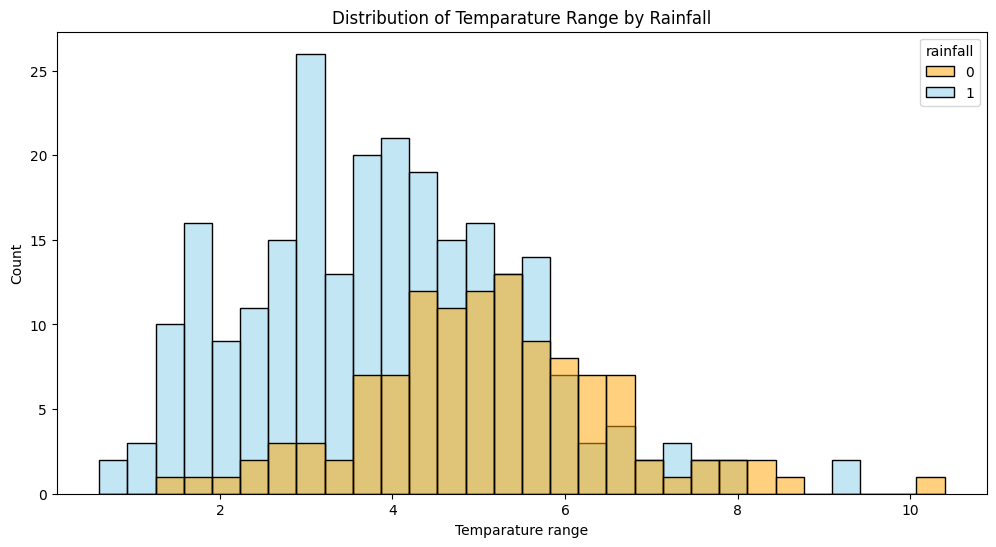

In [53]:
# Plot Distribution of Temparature Range by Rainfall
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='temp_range', hue='rainfall', bins=30, palette=color_map)
plt.title("Distribution of Temparature Range by Rainfall")
plt.xlabel("Temparature range")
plt.show()

#### Rainfall Probability by Wind Direction

- To analyze how wind direction influences rainfall, wind angles were grouped into compass directions using pd.cut(). The average rainfall probability was then calculated for each direction by taking the mean of the rainfall variable. Missing values were filled with 0 to ensure smooth visualization. An additional angle column (in radians) was created for polar or circular plots.

In [54]:
# Create data for Rainfall Probability
bins = np.arange(0,361,30)
labels = ['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE', 'S', "SSW", 'SW', 'WSW']

df['wind_direction'] = pd.cut(df['winddirection'], bins=bins, labels=labels, include_lowest=True)
# df['wind_direction']

rain_per = df.groupby('wind_direction')['rainfall'].mean().reset_index()
rain_per['angle'] = np.deg2rad(np.arange(0,360,30))
rain_per['rainfall'] = rain_per['rainfall'].fillna(0)
rain_per

,wind_direction,rainfall,angle
0,N,0.620253,0.000000
1,NNE,0.696629,0.523599
2,NE,0.724638,1.047198
3,ENE,0.785714,1.570796
4,E,0.555556,2.094395
5,ESE,0.583333,2.617994
6,SE,0.800000,3.141593
7,SSE,0.690909,3.665191
8,S,0.666667,4.188790
9,SSW,0.333333,4.712389


- Winds from the ENE to SSE directions show the highest rainfall probabilities (over 60%).
- Northern and western wind directions are less likely to result in rain, making wind direction a potential predictor.

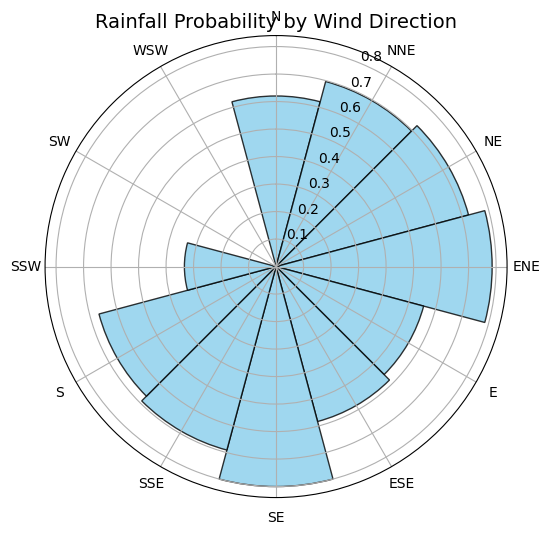

In [55]:
# Plot Rainfall Probability by Wind Direction
fig = plt.figure(figsize=(6, 6))
ax = plt.subplot(111, polar=True)

# Polar plot - bars
bars = ax.bar(
    rain_per['angle'],
    rain_per['rainfall'],
    width=np.deg2rad(30),
    bottom=0.0,
    color='skyblue',
    edgecolor='black',
    alpha=0.8
)

# Customize the plot
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.set_xticks(rain_per['angle'])
ax.set_xticklabels(rain_per['wind_direction'])

ax.set_title("Rainfall Probability by Wind Direction", fontsize=14)
plt.show()

## Label Encoding

- To prepare the data for machine learning algorithms, categorical variables must be converted into numerical format. In this dataset, wind_direction is a categorical feature containing directional values like N, NE, SW, etc converted into numeric values.

In [56]:
# Apply label Encoding
le = LabelEncoder()
df['wind_direction'] = le.fit_transform(df['wind_direction'])

#### Correlation Heatmap

- Rainfall is strongly correlated with cloud cover (0.63) and humidity (0.49), and negatively with sunshine (-0.55), indicating rainy days are cloudier, more humid, and darker.
Temperature-related features (max, min, average) show very high mutual correlation (>0.98), reflecting redundancy.
Derived features like cloud_sun_ratio and temp_pressure_index align well with their source variables, validating feature engineering.
Pressure, temperature range, and humidity-dew gap have weaker correlations with rainfall, but may still offer complementary signals.

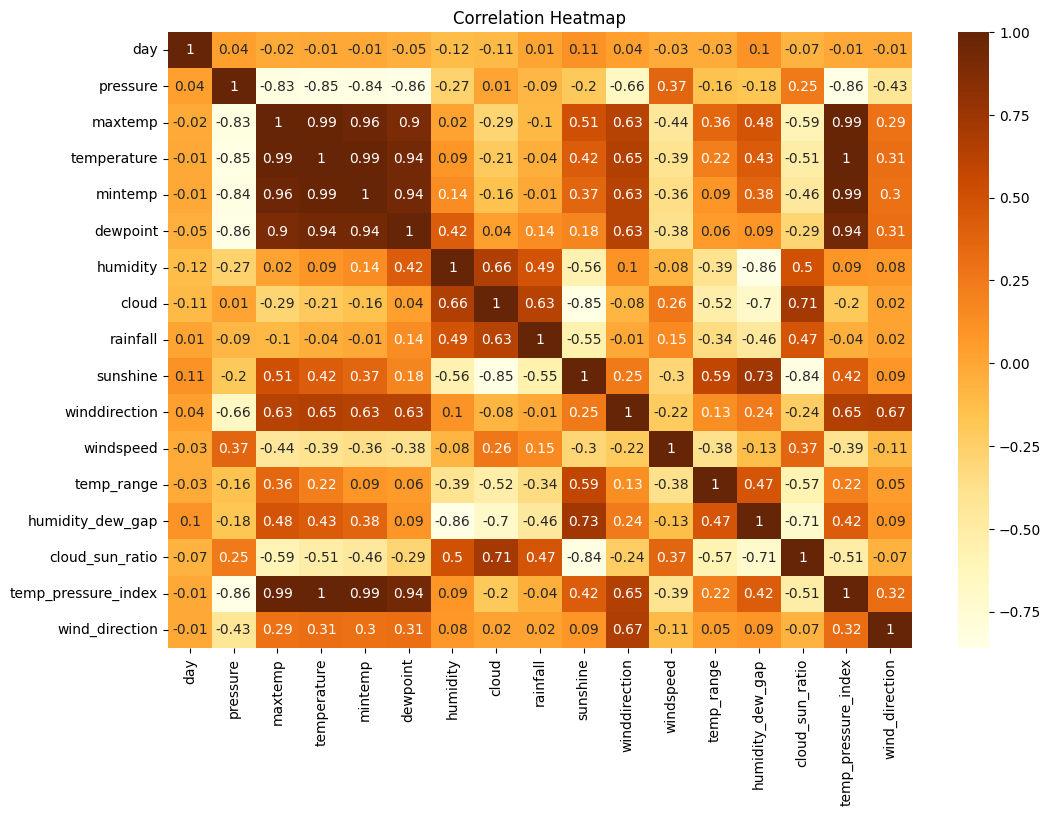

In [57]:
# Polt correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(round(df.corr(), 2), annot=True, cmap='YlOrBr')
plt.title("Correlation Heatmap")
plt.show()

## Pre-Processing

#### Feature Selection

- In the below code, select the feature and target variables. These variables are chosen using the correlation heatmap, form this we observed that features 'day', 'maxtemp', 'temparature', 'mintemp', '         winddirection', 'temp_pressure_index', 'wind_direction' have very low correlation with rainfall.

In [58]:
# Feature Selection
X = df.drop(columns=['rainfall', 'day', 'maxtemp', 'temperature', 'mintemp', 'winddirection', 'temp_pressure_index', 'wind_direction'])
y = df['rainfall']

#### Train Test Split

- Then apply train_test_split() to split the data into a training and testing set. Here, training set conatin 80% data and testing set conatins 20% data.
- Data splitting is important to evaluate the model's performance on unseen data to prevent overfitting. It ensures the model generalizes well by using separate training and testing sets.

In [59]:
# Apply train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape, y_train.shape

((292, 9), (292,))

#### Standard Scaler

- Here feature scaling is applied, as feature scaling is a curcial step for distnace based algorithms.

In [60]:
# Apply Normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Machine Learning Models

#### ML Models

- Here we applied 5 ML models:
1. Logistic Regression
2. Random Forest
3. Support Vector Machine
4. XGBoost
5. Gradinet Boosting

Logistic Regression - Accuracy: 0.84
Calssification Report:
               precision    recall  f1-score   support

           0       0.74      0.74      0.74        23
           1       0.88      0.88      0.88        50

    accuracy                           0.84        73
   macro avg       0.81      0.81      0.81        73
weighted avg       0.84      0.84      0.84        73





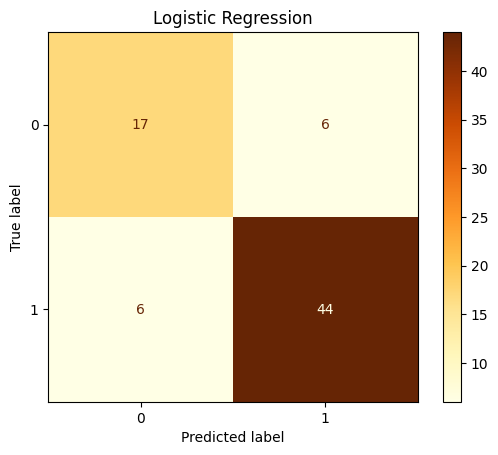

Random Forest - Accuracy: 0.81
Calssification Report:
               precision    recall  f1-score   support

           0       0.65      0.71      0.68        21
           1       0.88      0.85      0.86        52

    accuracy                           0.81        73
   macro avg       0.77      0.78      0.77        73
weighted avg       0.81      0.81      0.81        73





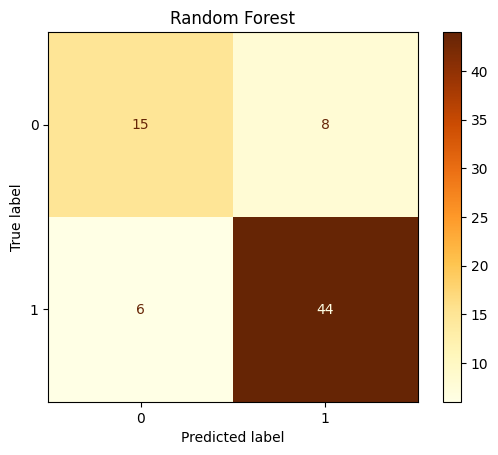

Support Vector Machine - Accuracy: 0.84
Calssification Report:
               precision    recall  f1-score   support

           0       0.70      0.76      0.73        21
           1       0.90      0.87      0.88        52

    accuracy                           0.84        73
   macro avg       0.80      0.81      0.80        73
weighted avg       0.84      0.84      0.84        73





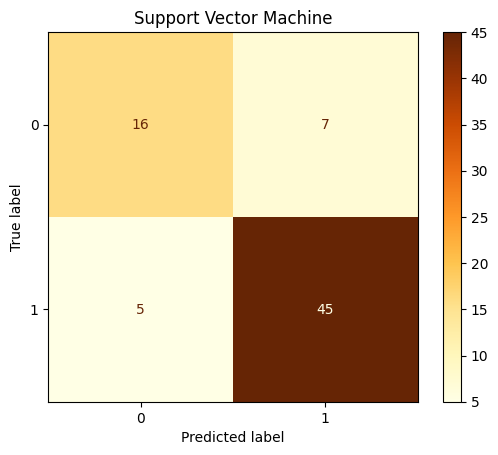

XGBoost - Accuracy: 0.79
Calssification Report:
               precision    recall  f1-score   support

           0       0.70      0.67      0.68        24
           1       0.84      0.86      0.85        49

    accuracy                           0.79        73
   macro avg       0.77      0.76      0.76        73
weighted avg       0.79      0.79      0.79        73





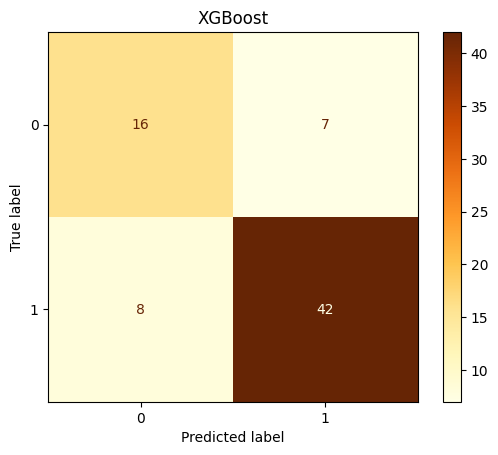

Gradient Boosting - Accuracy: 0.78
Calssification Report:
               precision    recall  f1-score   support

           0       0.61      0.67      0.64        21
           1       0.86      0.83      0.84        52

    accuracy                           0.78        73
   macro avg       0.73      0.75      0.74        73
weighted avg       0.79      0.78      0.78        73





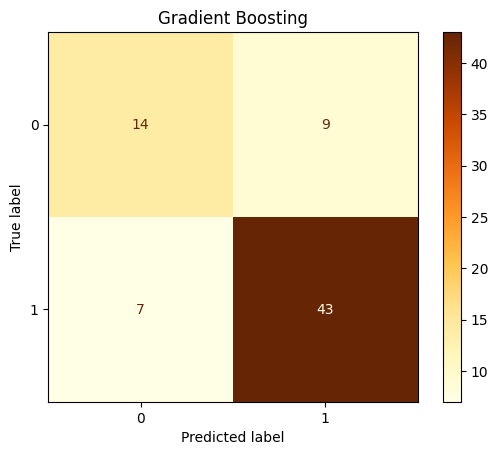

In [61]:
# Define ML models
models ={
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(),
    "XGBoost": XGBClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

for name, model in models.items():
    # Fit models
    model.fit(X_train, y_train)

    # Make a prediction for test data
    pred = model.predict(X_test)

    # classification report
    class_report = classification_report(pred, y_test)

    # Print the Accuracy score
    print(f"{name} - Accuracy: {accuracy_score(pred, y_test):.2f}")
    print(f"Calssification Report:\n {class_report}")
    print("\n")

    # Confusion Matrix
    conf_matirx = confusion_matrix(y_test, pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matirx)
    disp.plot(cmap='YlOrBr')
    plt.title(f"{name}")
    plt.show()

#### ML Models - After SMOTE

In [62]:
# Apply SMOTE
smote = SMOTE(random_state=95)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
X_test_smote, y_test_smote = smote.fit_resample(X_test, y_test)

Logistic Regression (After SMOTE) - Accuracy: 0.84
Calssification Report:
               precision    recall  f1-score   support

           0       0.80      0.90      0.85        50
           1       0.89      0.78      0.83        50

    accuracy                           0.84       100
   macro avg       0.84      0.84      0.84       100
weighted avg       0.84      0.84      0.84       100





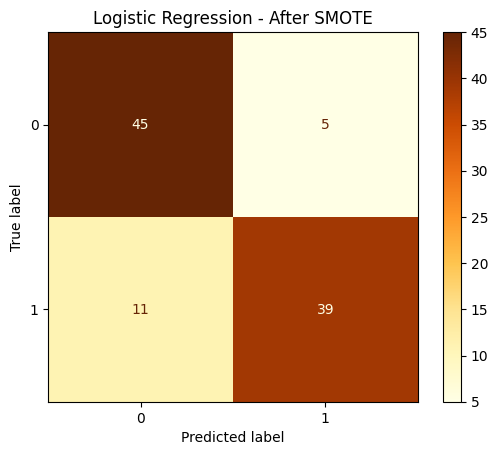

Random Forest (After SMOTE) - Accuracy: 0.83
Calssification Report:
               precision    recall  f1-score   support

           0       0.80      0.88      0.84        50
           1       0.87      0.78      0.82        50

    accuracy                           0.83       100
   macro avg       0.83      0.83      0.83       100
weighted avg       0.83      0.83      0.83       100





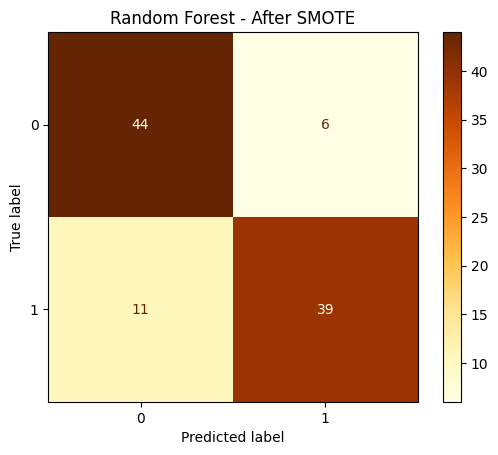

Support Vector Machine (After SMOTE) - Accuracy: 0.86
Calssification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.87        50
           1       0.89      0.82      0.85        50

    accuracy                           0.86       100
   macro avg       0.86      0.86      0.86       100
weighted avg       0.86      0.86      0.86       100





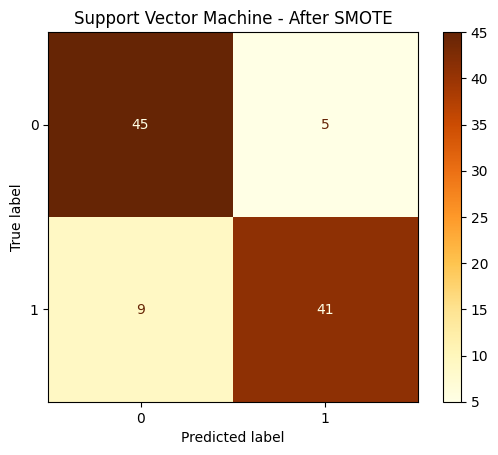

XGBoost (After SMOTE) - Accuracy: 0.82
Calssification Report:
               precision    recall  f1-score   support

           0       0.81      0.84      0.82        50
           1       0.83      0.80      0.82        50

    accuracy                           0.82       100
   macro avg       0.82      0.82      0.82       100
weighted avg       0.82      0.82      0.82       100





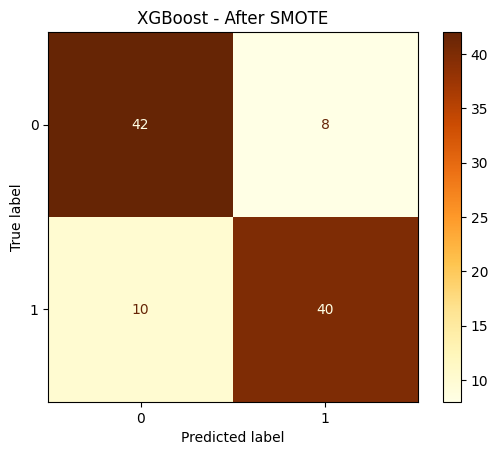

Gradient Boosting (After SMOTE) - Accuracy: 0.82
Calssification Report:
               precision    recall  f1-score   support

           0       0.78      0.90      0.83        50
           1       0.88      0.74      0.80        50

    accuracy                           0.82       100
   macro avg       0.83      0.82      0.82       100
weighted avg       0.83      0.82      0.82       100





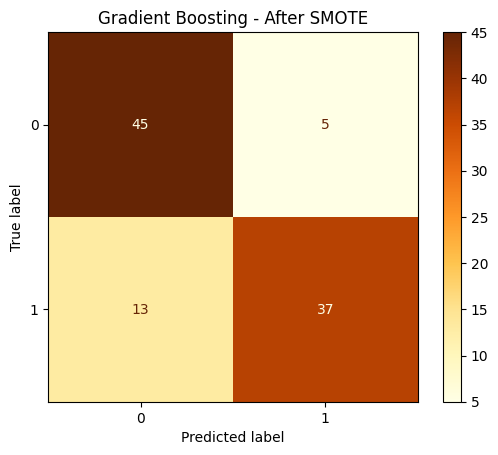

In [63]:
# Define ML models
models ={
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(),
    "XGBoost": XGBClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

for name, model in models.items():
    # Fit models
    model.fit(X_train_smote, y_train_smote)

    # Make a prediction for test data
    pred = model.predict(X_test_smote)

    # classification report
    class_report = classification_report(y_test_smote, pred)

    # Print the Accuracy score
    print(f"{name} (After SMOTE) - Accuracy: {accuracy_score(y_test_smote, pred):.2f}")
    print(f"Calssification Report:\n {class_report}")
    print("\n")

    # Confusion Matrix
    conf_matirx = confusion_matrix(y_test_smote, pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matirx)
    disp.plot(cmap='YlOrBr')
    plt.title(f"{name} - After SMOTE")
    plt.show()

#### Random Forest - After Hyperparameter Tuning

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Estimator:  {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Support Vector Machine(After Hypertuning) - Accuracy: 0.86
Calssification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.87        50
           1       0.89      0.82      0.85        50

    accuracy                           0.86       100
   macro avg       0.86      0.86      0.86       100
weighted avg       0.86      0.86      0.86       100





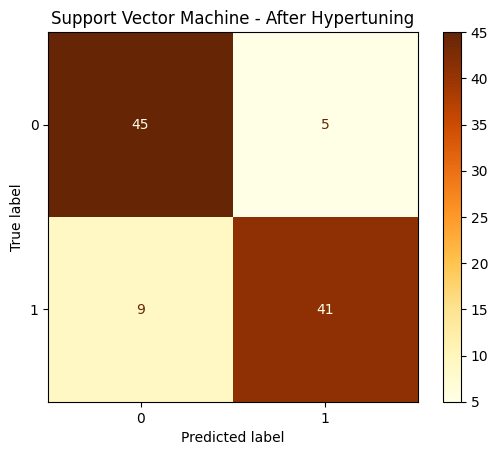

In [64]:
# Define SVM
svm = SVC()

# Define parameter grid
param_grid = {
    'C': [0.1, 1],
	'gamma': ['scale', 0.1],
	'kernel': ['linear', 'poly', 'rbf']
}

# Fit hypertuned model
clf = GridSearchCV(svm, param_grid = param_grid, cv = 5, verbose=1, n_jobs=-1)
clf.fit(X_train_smote,y_train_smote)

# Print best parameters
print("Best Estimator: ", clf.best_params_)
best_clf = clf.best_estimator_

# Make a prediction for test data
svm_pred = best_clf.predict(X_test_smote)

# classification report
svm_rep = classification_report(y_test_smote, svm_pred)

# Print the Accuracy score
print(f"Support Vector Machine(After Hypertuning) - Accuracy: {accuracy_score(y_test_smote, svm_pred):.2f}")
print(f"Calssification Report:\n {svm_rep}")
print("\n")

# Confusion Matrix
conf_matirx = confusion_matrix(y_test_smote, svm_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matirx)
disp.plot(cmap='YlOrBr')
plt.title("Support Vector Machine - After Hypertuning")
plt.show()

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'max_features': 'log2', 'max_depth': None, 'criterion': 'gini'}
Random Forest (Hypertuned) Accuracy: 0.83
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.88      0.84        50
           1       0.87      0.78      0.82        50

    accuracy                           0.83       100
   macro avg       0.83      0.83      0.83       100
weighted avg       0.83      0.83      0.83       100



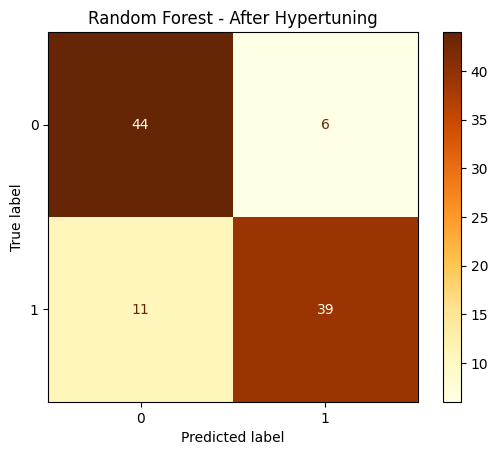

In [65]:
# Define Random Forest
rf = RandomForestClassifier(random_state=42)

# Define parameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 400],        # number of trees
    'criterion': ['gini', 'entropy'],       # split criterion
    'max_depth': [None, 8, 16, 32],         # max depth of trees
    'min_samples_split': [2, 4, 8],         # min samples to split a node
    'max_features': ['sqrt', 'log2', None]  # features to consider at each split
}

# Randomized search: n_iter = number of random combinations to try
clf = RandomizedSearchCV(
    rf,
    param_distributions=param_grid,
    n_iter=20,
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit on SMOTE training data
clf.fit(X_train_smote, y_train_smote)

# Best estimator
best_clf = clf.best_estimator_
print("Best Parameters:", clf.best_params_)

# Predict on test data
rf_pred = best_clf.predict(X_test_smote)

# Accuracy & classification report
print(f"Random Forest (Hypertuned) Accuracy: {accuracy_score(y_test_smote, rf_pred):.2f}")
print("Classification Report:\n", classification_report(y_test_smote, rf_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test_smote, rf_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='YlOrBr')
plt.title("Random Forest - After Hypertuning")
plt.show()

#### Feature Importance - Random Forest

- The Random Forest model identifies cloud cover as the most important feature for predicting rainfall, followed by cloud_sun_ratio and sunshine, highlighting the dominant role of atmospheric opacity.
Humidity and related metrics like humidity-dew gap also contribute significantly, while windspeed and temperature range play a lesser role in prediction.

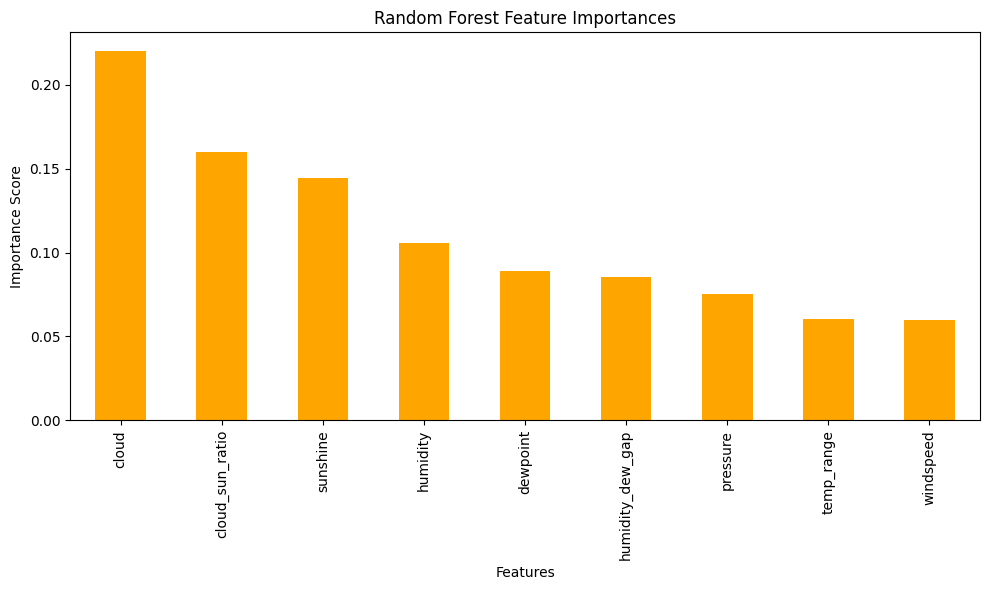

In [66]:
feature_names = X.columns
importances = best_clf.feature_importances_
feature_importance_df = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
feature_importance_df.plot(kind='bar', color='orange')
plt.title('Random Forest Feature Importances')
plt.ylabel('Importance Score')
plt.xlabel('Features')
plt.tight_layout()
plt.show()

## Result

#### Before SMOTE:
- Logistic Regression: 0.84
- Random Forest: 0.81
- Support Vector Machine: 0.84
- XBBoost: 0.73
- Gradient Boosting: 0.78

#### After SMOTE:
- Logistic Regression: 0.84
- Random Forest: 0.83
- Support Vector Machine: 0.86
- XGBoost: 0.82
- Gradient Boosting: 0.82

#### After HyperTuning:
- Support Vector Machine: 0.86
- Random Forest: 0.83

#### Conclusion:
- Applying SMOTE improved the performance of most models, especially SVM, which rose from 0.84 to 0.86, indicating strong capability in handling class imbalance.
- Random Forest also saw improvement from 0.81 to 0.83 after SMOTE, and maintained this performance even after hyperparameter tuning, suggesting its default settings were close to optimal.
- Logistic Regression remained stable at 0.84 before and after SMOTE, showing minimal impact from class balancing.
- XGBoost and Gradient Boosting both improved from 0.73 and 0.78 to 0.82 respectively after SMOTE, showing moderate sensitivity to data imbalance.
- Overall, SVM after SMOTE and hyperparameter tuning delivered the best performance (0.86), making it the most effective model in this setup.